# ********** Company Sales Problem **********

# 1. Bussiness Problem 
    A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

# 2. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree, datasets
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 3. Data Collection and Description

In [2]:
company_data = pd.read_csv('Company_Data.csv')
company_data1 = company_data.copy()
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [4]:
company_data1.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
company_data1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

## Outlier Check

D:\STUDY\DataScience\5_Programming\Python\Anaconda\AnacondaFile\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


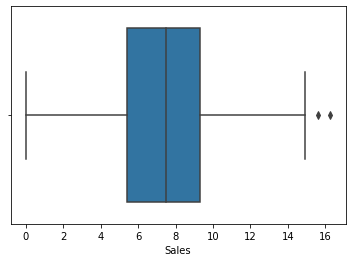

In [6]:
sales_outlier = sns.boxplot(company_data1['Sales'])

### Box plot shows that in 'Sales' data two outliers are present

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


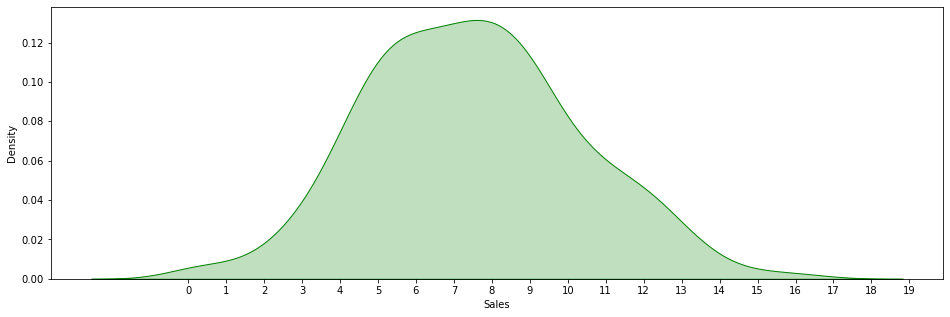

In [7]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(company_data1['Sales'].skew()))
print("Kurtosis: {}".format(company_data1['Sales'].kurtosis()))
ax = sns.kdeplot(company_data1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

### The data is Skwed on the right and the data has negative Kurtosis.

<ipython-input-8-027ff215223b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-8-027ff215223b>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


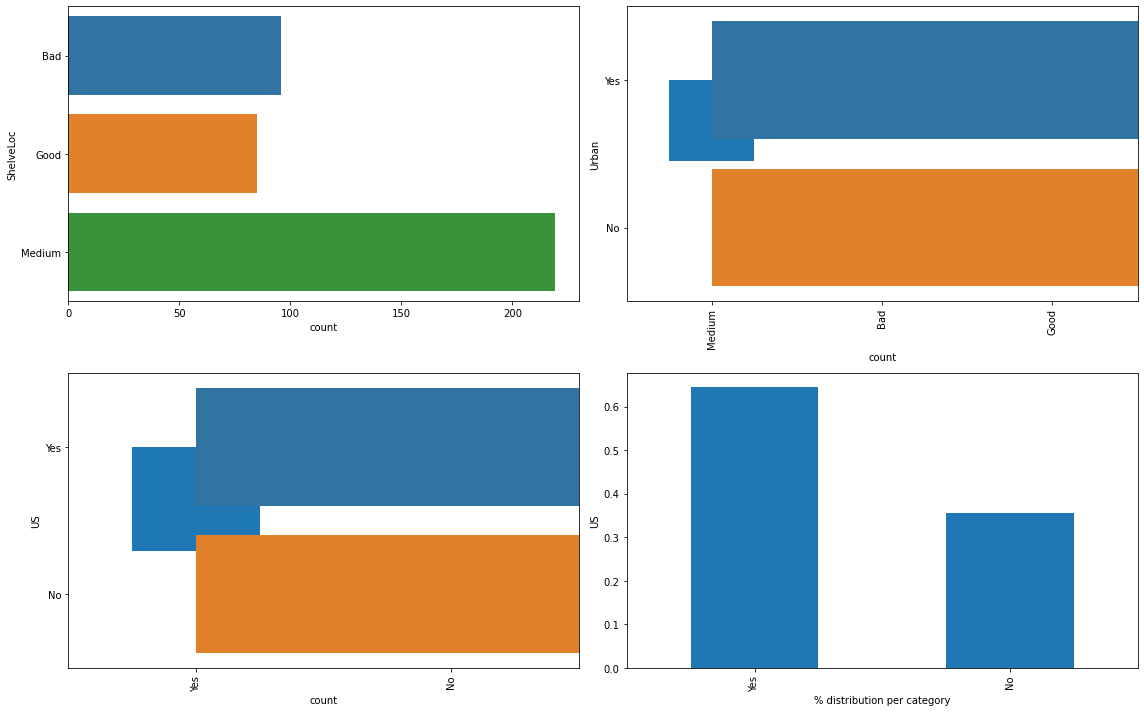

In [8]:
company_obj_colum = company_data1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(company_obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=company_data1,y=col)
    plt.subplot(2,2,i+1)
    company_data1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

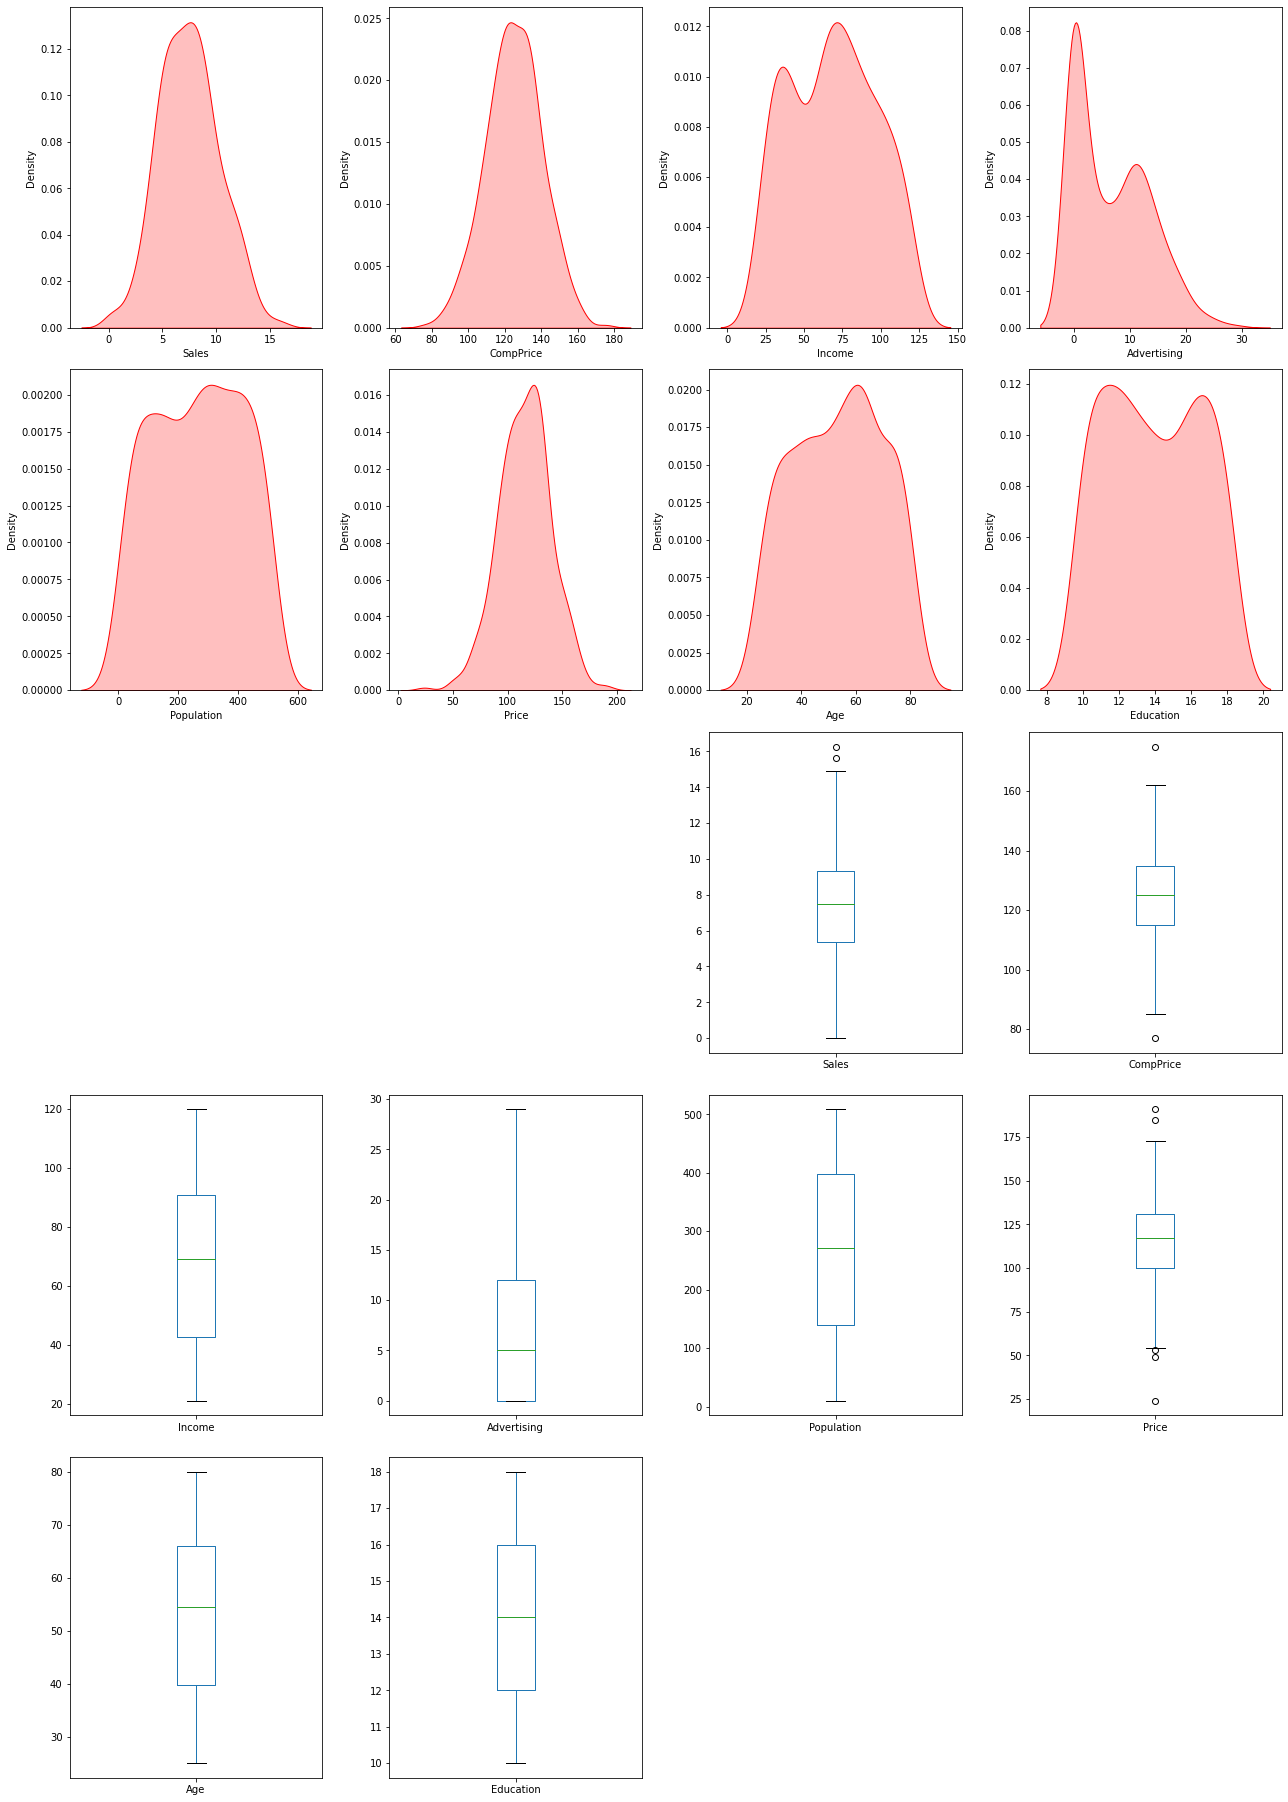

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [9]:
company_num_columns = company_data1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(company_num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(company_data[col],color='r',shade=True)
    plt.subplot(8,4,i+10)
    company_data[col].plot.box()
plt.tight_layout() 
plt.show()
company_num_data = company_data[company_num_columns]
pd.DataFrame(data=[company_num_data.skew(),company_num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

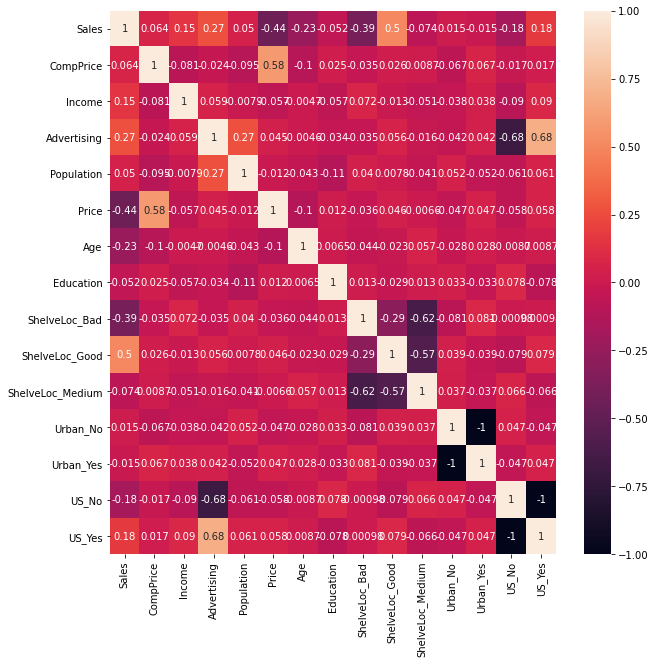

In [10]:
company_data1 = pd.get_dummies(company_data1, columns = ['ShelveLoc','Urban','US'])
company_data_corr = company_data1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(company_data_corr,annot=True)

# 4. Random Forest Model 
    Since, the target variable is continious we create a class of the value based on the mean.
    <= 7.49 : 'Small'
    > 7.49 : 'Large'

In [11]:
company_data1["sales"]="small"
company_data1.loc[company_data1["Sales"]>7.49,"sales"]="large"
company_data1.drop(["Sales"],axis=1,inplace=True)

In [12]:
X = company_data1.iloc[:,0:14]
y = company_data1.iloc[:,14]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

large    160
small    160
Name: sales, dtype: int64

In [13]:
company_model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
company_model.fit(x_train,y_train)
company_model.oob_score_

0.790625

In [14]:
company_pred_train = company_model.predict(x_train)
accuracy_score(y_train, company_pred_train)

1.0

In [15]:
confusion_matrix(y_train, company_pred_train)

array([[160,   0],
       [  0, 160]], dtype=int64)

In [16]:
company_pred_test = company_model.predict(x_test)
accuracy_score(y_test, company_pred_test)

0.825

In [17]:
confusion_matrix(y_test,company_pred_test)

array([[33,  6],
       [ 8, 33]], dtype=int64)

In [18]:
company_data_t=pd.DataFrame({'Actual':y_test, 'Predicted':company_pred_test})
company_data_t.head(10)

,Actual,Predicted
89,large,small
4,small,small
154,small,large
371,large,small
227,large,large
351,large,large
183,small,small
270,large,large
341,small,small
111,small,small


# 5. Conclusion
    Since, accuracy of training data set is 100% we test the accuracy on the test data which is 81.25%.
    As seen from confusion matrix of test data 61 instances are predicted correctly and 19 instances are not.  

In [19]:
company_model.feature_importances_

array([0.11753861, 0.10361113, 0.09172898, 0.09622574, 0.22807287,
       0.12079517, 0.05866339, 0.05426966, 0.05579748, 0.02289135,
       0.01450653, 0.01196011, 0.01199423, 0.01194473])

In [20]:
company_important_factor = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': company_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
company_important_factor

,feature,importance
4,Price,0.228073
5,Age,0.120795
0,CompPrice,0.117539
1,Income,0.103611
3,Population,0.096226
2,Advertising,0.091729
6,Education,0.058663
8,ShelveLoc_Good,0.055797
7,ShelveLoc_Bad,0.054270
9,ShelveLoc_Medium,0.022891


### As seen in the above table Price is most important feature

# ********** Fraud Check Problem **********

# 1. Bussiness Problem 
    Use Random Forest to prepare a model on fraud data. 

# 2. Importing Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree, datasets
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# 3. Data Collection and Description

In [22]:
fraud_data = pd.read_csv('Fraud_check.csv')
fraud_data1 = fraud_data.copy()
fraud_data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [23]:
fraud_data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [24]:
fraud_data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [25]:
fraud_data1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Outlier Check

D:\STUDY\DataScience\5_Programming\Python\Anaconda\AnacondaFile\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


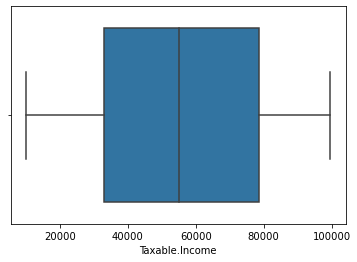

In [26]:
income_outlier = sns.boxplot(fraud_data1['Taxable.Income'])

### Box plot shows that in 'Taxable.Income' data no outliers are present.

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


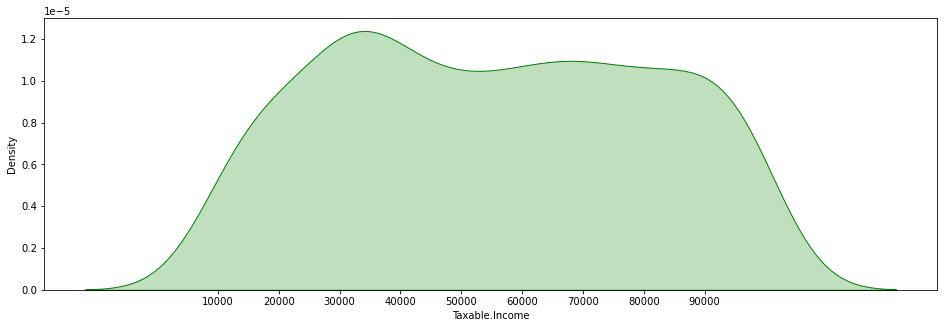

In [27]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(fraud_data1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(fraud_data1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(fraud_data1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

### The data is Skwed on the right and the data has negative Kurtosis.

<ipython-input-28-254462c5f63a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-28-254462c5f63a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


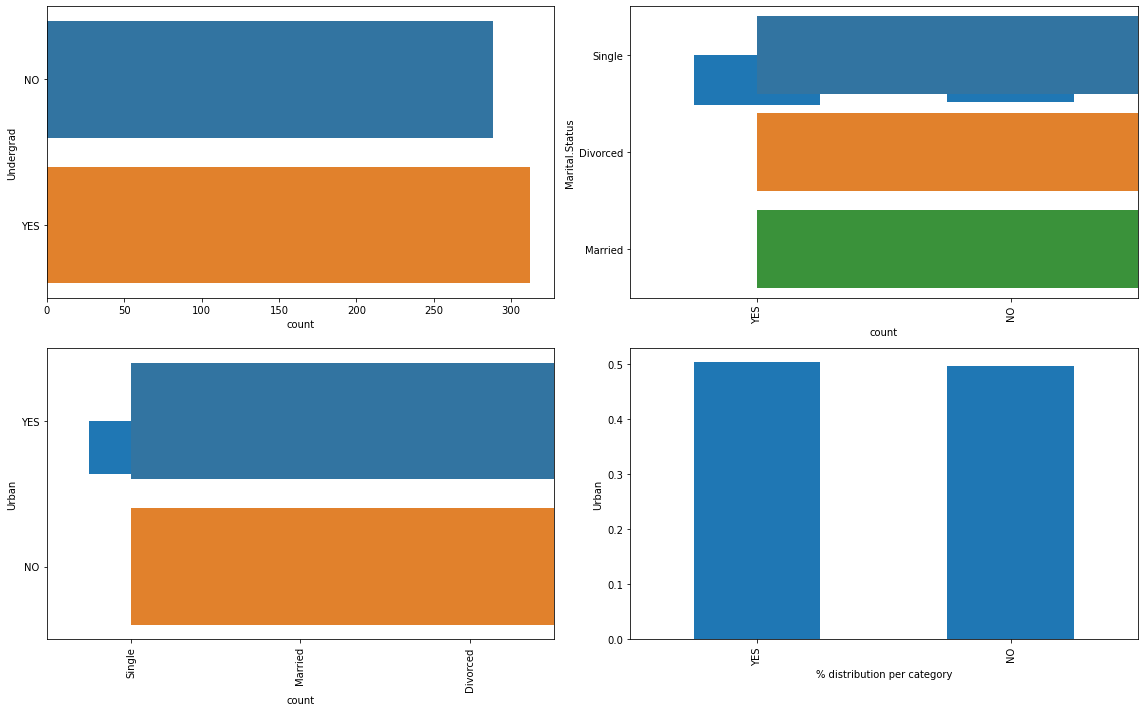

In [28]:
fraud_obj_colum =fraud_data1.select_dtypes(include='object').columns.tolist()
plt.figure(figsize=(16,10))
for i,col in enumerate(fraud_obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=fraud_data1,y=col)
    plt.subplot(2,2,i+1)
    fraud_data1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

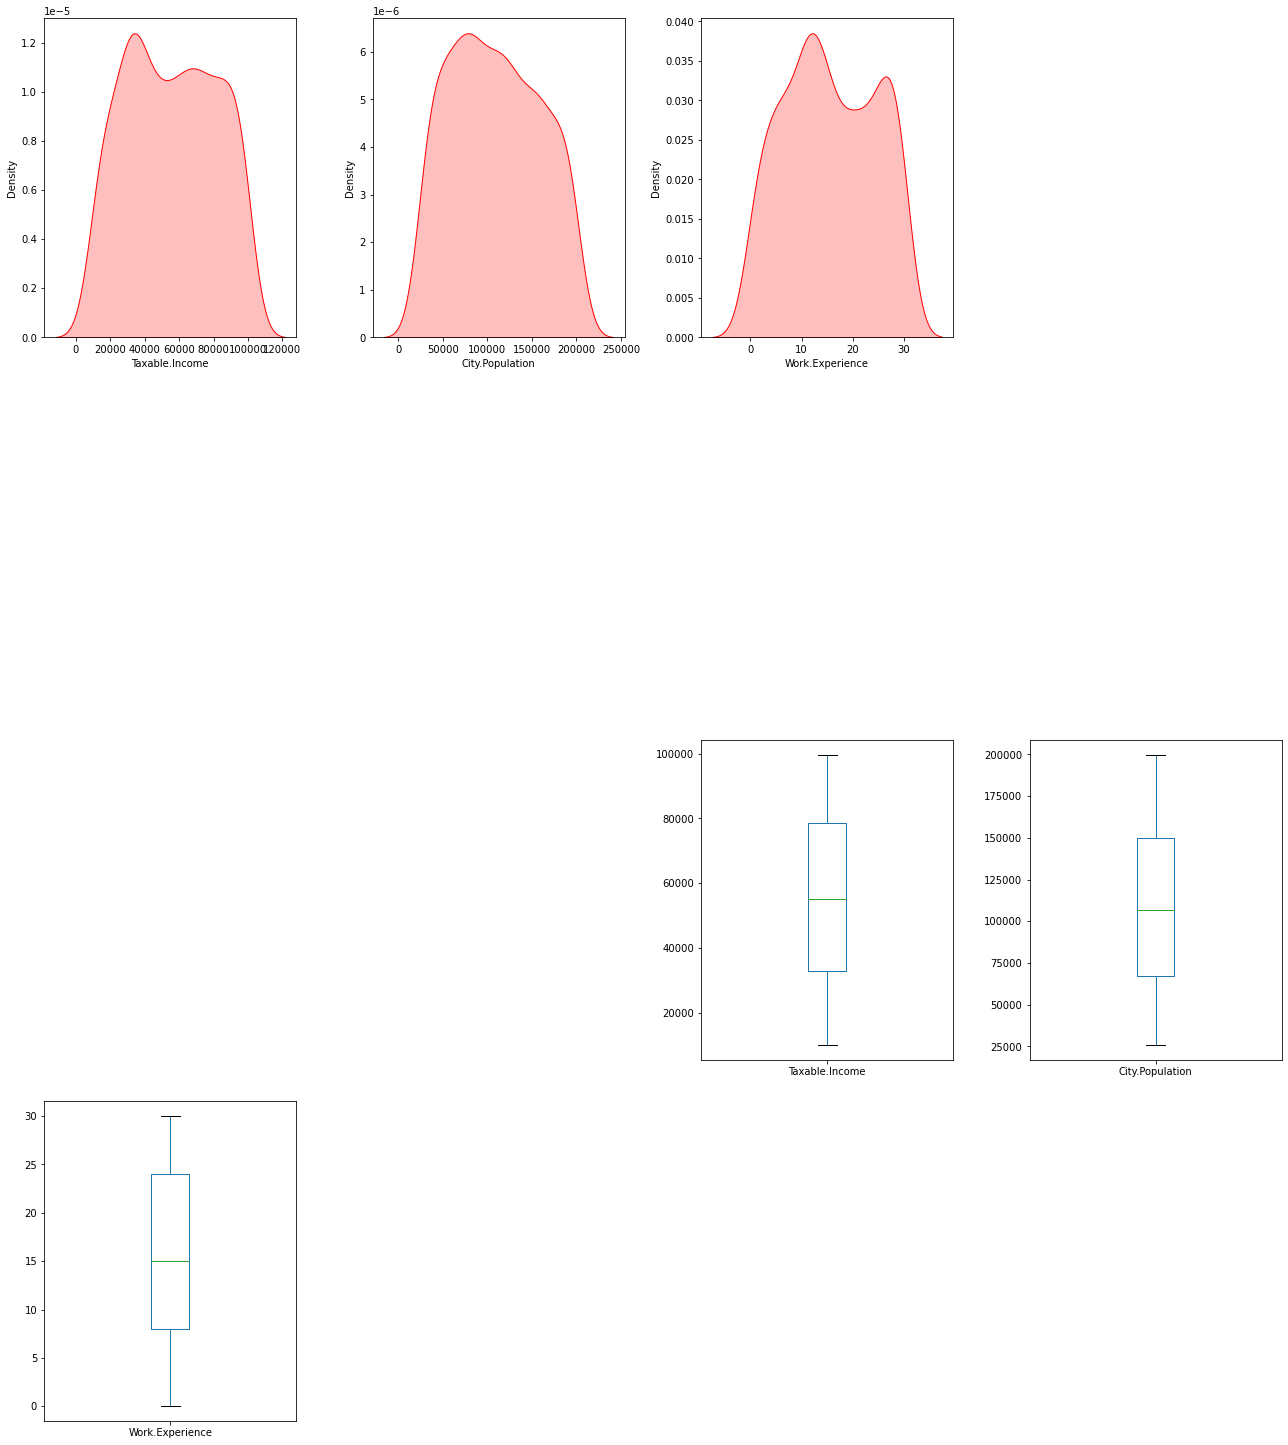

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [29]:
fraud_num_columns = fraud_data1.select_dtypes(exclude='object').columns.tolist()
plt.figure(figsize=(18,40))
for i,col in enumerate(fraud_num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(fraud_data[col],color='r',shade=True)
    plt.subplot(8,4,i+10)
    fraud_data[col].plot.box()
plt.tight_layout() 
plt.show()
fraud_num_data = fraud_data[fraud_num_columns]
pd.DataFrame(data=[fraud_num_data.skew(),fraud_num_data.kurtosis()],index=['skewness','kurtosis'])

<AxesSubplot:>

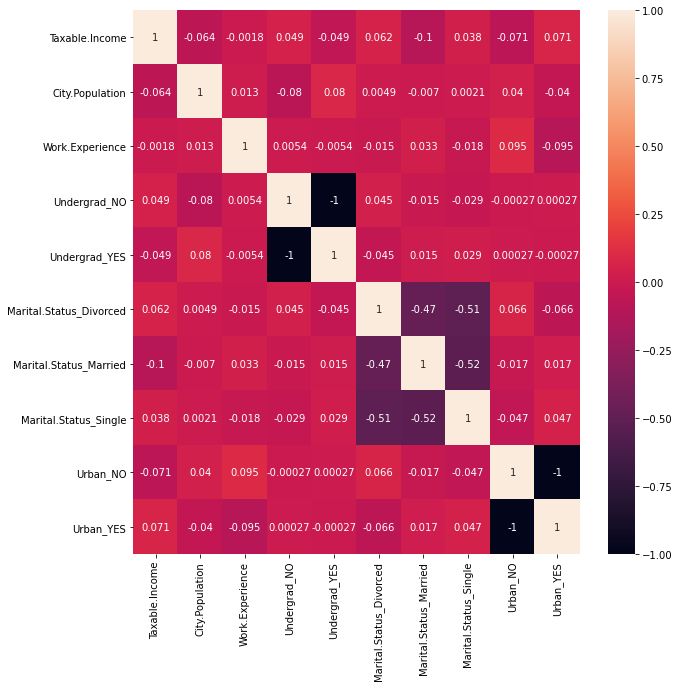

In [30]:
fraud_data1 = pd.get_dummies(fraud_data1)
fraud_data_corr = fraud_data1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(fraud_data_corr,annot=True)

# 4. Random Forest Model 
    Since, the target variable is continious we create a class of taxable_income based on,
    <= 30000 : "Risky" 
    >30000 : "Good" 

In [31]:
fraud_data1['Taxable.Income']=pd.cut(fraud_data1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [32]:
X = fraud_data1.iloc[:,1:10]
y = fraud_data1.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
y_train.value_counts()

good     377
risky    103
Name: Taxable.Income, dtype: int64

In [33]:
fraud_data1_model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
fraud_data1_model.fit(x_train,y_train)
fraud_data1_model.oob_score_

0.7208333333333333

In [34]:
fraud_pred_train = fraud_data1_model.predict(x_train)
accuracy_score(y_train, fraud_pred_train)

1.0

In [35]:
confusion_matrix(y_train,fraud_pred_train)

array([[377,   0],
       [  0, 103]], dtype=int64)

In [36]:
fraud_pred_test = fraud_data1_model.predict(x_test)
accuracy_score(y_test,fraud_pred_test)

0.75

In [37]:
fraud_data1_t=pd.DataFrame({'Actual':y_test, 'Predicted':fraud_pred_test})
fraud_data1_t.head(10)

,Actual,Predicted
423,good,risky
531,good,good
332,good,good
250,good,good
545,good,good
80,good,good
473,good,good
141,good,risky
388,good,good
350,good,good


# 5. Conclusion
    Since, accuracy of training data set is 100% we test the accuracy on the test data which is 73.33%.
    As seen from confusion matrix of test data 94 instances are predicted correctly and 26 instances are not.  

In [38]:
fraud_important_factor = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': fraud_data1_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fraud_important_factor

,feature,importance
0,City.Population,0.499110
1,Work.Experience,0.369620
6,Marital.Status_Single,0.022615
3,Undergrad_YES,0.019179
4,Marital.Status_Divorced,0.018805
5,Marital.Status_Married,0.018689
8,Urban_YES,0.018451
2,Undergrad_NO,0.017776
7,Urban_NO,0.015755


### As seen in the above table city population is most important feature